<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/1.pytorch%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch로 시작하는 딥 러닝 입문

이 깃허브는 WikiDocs의 'PyTorch로 시작하는 딥 러닝 입문' 책을 참고했다.

이 책은 딥 러닝 프레임워크 PyTorch를 사용하여 딥 러닝에 입문하는 것을 목표로 한다.

파이토치 공식 문서 링크 : https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html

파이토치는 공식 문서를 참고하는 것도 좋은 방법이다.


출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/1.%20pytorch%20%EA%B8%B0%EC%B4%88.ipynb 

옆자리 형 깃허브에서 몰래 가져왔다. 

두 번째로 복습하기 위해 보고 있다. 

이전보다 추가했다.

2020년 12월 28일 세 번째로 보고 있다.

# Pytorch Vs. Tensorflow

딥 러닝 또는 심층 전이 학습(deep transfer learning)이 정확한 모델을 학습시키는 데 도움이 되는 경우가 있다. 이런 경우, 필요한 모델과 비슷한 학습된 모델이 프레임워크의 모델 라이브러리에 이미 존재한다면 좋을 것이다. 존재하고 바로 이게 Pytorch와 Tensorflow다.

참고 : http://www.itworld.co.kr/news/129659

* 프레임워크는 뼈대나 기반구조를 뜻하고, 소프트웨어의 특정 문제를 해결하기 위해서 상호 협력하는 클래스와 인터페이스의 집합이라고 할 수 있다. 

* 라이브러리는 단순 활용 가능한 도구들의 집합을 말하며, 개발자가 만든 클래스에서 호출하여 사용하고 클래스들의 나열로 필요한 클래스를 불러서 사용하는 방식을 취한다.

* 프레임워크는 전체적인 흐름을 스스로가 쥐고 있어 사용자가 그 안에서 필요한 코드를 짜 넣지만, 라이브러리는 사용자가 전체적인 흐름을 만들며 라이브러리를 가져다 쓴다. 프레임워크는 가져다가 사용한다기보다는 거기에 들어가서 사용한다는 느낌/관점이라면, 라이브러리는 가져다가 쓰는 느낌이다.

# 1. Pytorch 기초

기본적으로 pytorch(gpu) 및 기초 라이브러리가 깔려있고 기본적인 딥러닝 지식이 있다는 가정하에 진행한다.

colab 에서 진행하는 것이 편할 것 같다.

## 1.1 Pytorch 패키지의 기본 구성

1. torch

메인 네임스페이스다. 텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조(함수명들이 거의 똑같음)를 갖는다.

* 네임스페이스는 개체를 구분할 수 있는 범위를 나타내는말로, 일반적으로 하나의 네임스페이스에서는 하나의 이름이 단 하나의 개체만을 가리키게 된다.

In [1]:
import torch

colab 에서 진행하지 않다면 Pytorch를 설치해야 한다.

https://pytorch.org/get-started/locally/

여기서 설치할 수 있다.

2. torch.autograd

자동 미분을 위한 함수들이 포함되어져 있다. 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있다.

In [3]:
import torch.autograd

3. torch.nn

신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있다. 예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있다.

In [4]:
import torch.nn

4. torch.optim

확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있다.

In [5]:
import torch.optim

5. torch.utils.data

SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어져 있다.

In [6]:
import torch.utils.data

6. torch.onnx

ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용한다. ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷이다.

In [7]:
import torch.onnx

## 1.2 텐서 조작하기(Tensor Manipulation) 1

벡터, 행렬, 텐서의 개념에 대해서 이해하고, Numpy와 파이토치로 벡터, 행렬, 텐서를 다루는 방법을 이해하자.

1. 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

2. 넘파이 훑어보기(Numpy Review)

3. 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

4. 행렬 곱셈(Matrix Multiplication)

5. 다른 오퍼레이션들(Other Basic Ops)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor1.PNG)

차원이 없는 값을 스칼라 (위 그림에 없음)

1차원으로 구성된 값을 벡터 (위 그림 중 1D)

2차원으로 구성된 값을 행렬 (위 그림 중 2D)

3차원으로 구성된 값을 텐서 (위 그림 중 3D)

4차원 이상부터는 머리로 생각하기 어렵다. 3차원의 텐서를 위로 쌓아 올린 모습으로 상상해보자.

5차원은 4차원을 다시 옆으로 확장한 모습으로 상상해보자.

6차원은 5차원을 뒤로 확장한 모습으로 상상해보자.

인터스텔라 주인공 아저씨가 생각난다.

벡터나 행렬을 각각 1차원 텐서, 2차원 텐서로 표현하기도 한다.

다 텐서라고 부르자.

### 1.2.1 2D Tensor

딥러닝을 할 때 다루고 있는 데이터의 형태가 중요하다. 

텐서의 크기를 고려해야 한다. 

다음은 봐도 봐도 잊어버리는 그림이다. 

이번엔 꼭 기억하자

|t| = (Batch size, dim)


![](https://wikidocs.net/images/page/52460/tensor2.PNG)

위의 경우는 2차원 텐서의 크기 |t|를 (batch size X dimension)으로 표현했다.

다시 말하면, 아래의 그림과 같이 행렬에서 행의 크기가 batch size, 열의 크기가 dim이라는 의미다.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor3.PNG)

훈련 데이터 하나의 크기를 256이라고 해보자. 

[3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다.

훈련 데이터 하나는 벡터의 차원이 256개 있는 것이다. 

행렬 표현으로 1X256 이다.

만약 이런 훈련 데이터의 개수가 3,000개라고 한다면, 전체 현재 데이터의 크기는 3,000 * 256 이다.

컴퓨터는 훈련 데이터를 어떻게 처리할까? 3,000개를 1개씩 꺼내서 처리할 수도 있지만, 컴퓨터는 보통 덩어리로 처리한다.

3,000개에서 64개씩 꺼내서 처리한다고 하면 컴퓨터가 한 번에 처리하는 2차원 텐서의 크기는 (batch size X dim) = 64 X 256 이다.

In [8]:
"""
2D Tensor 예시
iris dataset
"""
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)

(150, 4)


iris dataset에는 150 X 4짜리 데이터가 있다.

10개만 가져와서 눈으로 봐보자

In [8]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

iris dataset는 2차원 텐서이다.

위에서 가져온 10개의 데이터는 텐서의 크기를 (batch size X dim) = 10 X 4 로 볼 수 있다.

### 1.2.2 3D Tensor - 이미지

![](https://wikidocs.net/images/page/52460/tensor4.PNG)

데이터의 형태가 이미지면 어떨까. 

1. 이미지는 가로가 있다.

2. 이미지는 세로가 있다.

3. 이미지는 여러 장이 있을 수 있다.

|t| = (batch size, width, height)

1. 가로는 width

2. 세로는 height

3. 여러 장은 batch size

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)

In [9]:
"""
3D Tensor 이미지 예시
digits(mnist와 비슷한 데이터) dataset
"""
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist['images'].shape)

(1797, 8, 8)


disits dataset에는 1797 X 8 X 8 짜리 데이터가 있다.

0을 나타내는 이미지를 가져와서 눈으로 봐보자

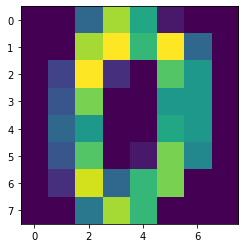

In [10]:
plt.imshow(mnist['images'][0])
plt.show()

digits dataset는 3차원 텐서이다.

텐서의 크기는 (batch size X width X height) = 1797 X 8 X 8 이다.

위의 그림은 8 X 8 짜리 이미지고 이 이미지가 1797개 있는 dataset 이다.

### 1.2.3 3D Tensor - 텍스트

![](https://wikidocs.net/images/page/52460/tensor4.PNG)

데이터의 형태가 텍스트면 어떨까. 

1. 텍스트는 단어의 길이가 있다.

2. 텍스트는 단어 벡터의 차원이 있다.

3. 텍스트는 여러 단어 벡터가 있을 수 있다.

|t| = (batch size, length, dim)

1. 단어의 길이는 length

2. 단어 벡터의 차원은 dim

3. 여러 단어 벡터는 batch size

![image.png](https://wikidocs.net/images/page/52460/tensor6.PNG)

In [11]:
"""
3D Tensor 텍스트 예시
아래와 같이 4개의 문장으로 구성된 전체 훈련 데이터가 있다.
"""

sentences = ['나는 사과를 좋아해', '나는 바나나를 좋아해', '나는 사과를 싫어해', '나는 바나나를 싫어해']

'''
컴퓨터는 '나는 사과를 좋아해'라는 문장으로는 단어가 1개인지 3개인지 이해하지 못한다. 
우선 컴퓨터의 입력으로 사용하기 위해서 단어별로 나누어줘야 한다.
'''
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]


In [12]:
'''
이제 훈련 데이터의 크기는 4 X 3의 크기를 가지는 2D 텐서이다.
컴퓨터는 텍스트보다 숫자를 더 잘 처리할 수 있는데, 이제 각 단어를 벡터로 만들것이다.
아래와 같이 단어를 3차원의 벡터로 변환했다고 하겠다.
'''

my_bow = {'나는':[0.1, 0.2, 0.9],
          '사과를':[0.3, 0.5, 0.1],
          '바나나를':[0.3, 0.5, 0.2],
          '좋아해':[0.7, 0.6, 0.5],
          '싫어해':[0.5, 0.6, 0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec)

[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]


In [13]:
'''
이제 훈련 데이터는 4 X 3 X 3의 크기를 가지는 3D 텐서이다.
'''

import numpy as np
print(np.array(word2vec))
print(np.array(word2vec).shape)

[[[0.1 0.2 0.9]
  [0.3 0.5 0.1]
  [0.7 0.6 0.5]]

 [[0.1 0.2 0.9]
  [0.3 0.5 0.2]
  [0.7 0.6 0.5]]

 [[0.1 0.2 0.9]
  [0.3 0.5 0.1]
  [0.5 0.6 0.7]]

 [[0.1 0.2 0.9]
  [0.3 0.5 0.2]
  [0.5 0.6 0.7]]]
(4, 3, 3)


In [14]:
'''
batch size를 2로 하면 2 X 3 X 3의 크기를 가지는 3D 텐서가 2개가 된다.
이 3D 텐서를 각각 첫번째 배치, 두번째 배치라고 표현할 수 있다.
'''

np.vsplit(np.array(word2vec), 2)

[array([[[0.1, 0.2, 0.9],
         [0.3, 0.5, 0.1],
         [0.7, 0.6, 0.5]],
 
        [[0.1, 0.2, 0.9],
         [0.3, 0.5, 0.2],
         [0.7, 0.6, 0.5]]]), array([[[0.1, 0.2, 0.9],
         [0.3, 0.5, 0.1],
         [0.5, 0.6, 0.7]],
 
        [[0.1, 0.2, 0.9],
         [0.3, 0.5, 0.2],
         [0.5, 0.6, 0.7]]])]

### 1.2.4 넘파이로 텐서 만들기(벡터와 행렬 만들기)

Pytorch로 텐서를 만들기 전에 Numpy로 텐서를 만들어서 힘들어보자.

In [15]:
import numpy as np

Numpy로 1차원 벡터를 만들어보자.

In [16]:
t=np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


1차원 벡터의 차원과 크기를 출력해보자.

In [17]:
print('Rank of t: ', t.ndim) # 몇 차원인지 출력
print('Shape of t: ', t.shape) # 크기를 출력

Rank of t:  1
Shape of t:  (7,)


Numpy에서 각 벡터의 원소에 접근하는 방법

In [18]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [19]:
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) # [시작 번호 : 끝 번호]로 범위 지정을 통해 가져온다.

t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


In [20]:
print('t[:2] t[3:]     = ', t[:2], t[3:]) # 시작 번호를 생략한 경우와 끝 번호를 생략한 경우

t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


Numpy로 2차원 행렬을 만들어보자.

In [21]:
t=np.array([[1., 2., 3.],
            [4., 5., 6.,],
            [7., 8., 9.,],
            [10., 11., 12.,]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [22]:
print('Rank of t: ', t.ndim) # 몇 차원인지 출력
print('Shape of t: ', t.shape) # 크기를 출력

Rank of t:  2
Shape of t:  (4, 3)


### 1.2.5 파이토치로 텐서 만들기

In [23]:
import torch

Pytorch로 1차원 벡터를 만들어보자.

In [24]:
t = torch.tensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [25]:
print(t.dim()) # 몇 차원인지 출력
print(t.shape) # 크기를 출력
print(t.size()) # 크기를 출력

1
torch.Size([7])
torch.Size([7])


Pytorch에서 각 벡터의 원소에 접근하는 방법

In [26]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


Pytorch로 2차원 행렬을 만들어보자.

In [27]:
t = torch.tensor([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.,],
                 [10., 11., 12.]
                 ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [28]:
print(t.dim()) # 몇 차원인지 출력
print(t.shape) # 크기를 출력
print(t.size()) # 크기를 출력

2
torch.Size([4, 3])
torch.Size([4, 3])


In [29]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 두번째 것만 가져온다.
print(t[:, 1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [30]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 마지막 것만 제외하고 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


### 1.2.6 브로드캐스팅(Broadcasting)

두 행렬의 덧셈과 뺄셈을 하려면 두 행렬의 크기가 같아야 한다.

두 행렬의 곱셉을 할 때는 앞 행렬의 마지막 차원과 뒤 행렬의 첫번째 차원이 일치해야 한다.

딥 러닝을 하게 되면 불가피하게 크기가 다른 행렬 또는 텐서에 대해서 사칙 연산을 수행할 필요가 있다. 이 경우를 위해 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하게 만드는 브로드캐스팅이라는 기능을 제공한다.

In [31]:
# 크기가 같은 텐서에 대한 연산

m1 = torch.tensor([[3., 3.]])
m2 = torch.tensor([[2., 2.]])
print(m1+m2)

tensor([[5., 5.]])


In [32]:
# 크기가 다른 텐서에 대한 연산

m1 = torch.tensor([[1., 2.]])
m2 = torch.tensor([3])
print(m1+m2)
# m2 가 [[3,3]] 이 되어 더해진다

tensor([[4., 5.]])


In [33]:
# 2 x 1 Vector + 1 X 2 Vector
m1 = torch.tensor([[1., 2.]])
m2 = torch.tensor([[3.],
                   [4.]])
print(m1 + m2)


# [1,2]
# ==> [[1, 2].
#      [1, 2]]
    
# [3]
# [4]
# ==> [[3, 3],
#      [4, 4]]


tensor([[4., 5.],
        [5., 6.]])


브로드캐스팅은 자동으로 실행되기 때문에 텐서를 다룰 때는 크기를 잘 파악해야한다!

### 1.2.7 곱셈, 평균, 덧셈, 최대, 아그맥스

행렬 곱셈 Vs. 원소별 곱셈

(Matrix Mulitiplication Vs. Multiplitcation)

행렬 곱셈(.matmul) Vs. 원소별 곱셈(.mul)

외적과 내적 느낌이다.

In [34]:
# 행렬 곱셈(.matmul)
m1 = torch.tensor([[1., 2.],
                  [3., 4.]])
m2 = torch.tensor([[1.],
                   [2.]])
print('Shape of Matrix 1: ', m1.size()) # 2 x 2
print('Shape of Matrix 2: ', m2.size()) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [35]:
# 원소별 곱셈(.mul)
# 원소별 곱셈(element-wise)을 하면 브로드캐스팅이 된 후에 수행된다.
m1 = torch.tensor([[1., 2.],
                  [3., 4.]])
m2 = torch.tensor([[1.],
                   [2.]])
print('Shape of Matrix 1: ', m1.size()) # 2 x 2
print('Shape of Matrix 2: ', m2.size()) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


평균을 구할 수도 있다.

In [36]:
t = torch.tensor([1., 2.])
print(t.mean())

tensor(1.5000)


In [37]:
t = torch.tensor([[1., 2.], 
                  [3., 4.]])
print(t.mean())

tensor(2.5000)


In [38]:
# 차원별로 보자
print(t)
print(t.mean(dim=0)) # 첫번째 차원을 없앤 후 평균이다. 여기서는 행을 없앤 후 열의 평균이다.
print(t.mean(dim=1)) # 두번째 차원을 없앤 후 평균이다. 여기서는 열을 없앤 후 행의 평균이다.

tensor([[1., 2.],
        [3., 4.]])
tensor([2., 3.])
tensor([1.5000, 3.5000])


덧셈도 있다.

In [39]:
print(t)
print(t.sum())
print(t.sum(dim=0)) # 첫번째 차원을 없앤 후 덧셈이다. 여기서는 행을 없앤 후 열의 덧셈이다.
print(t.sum(dim=1)) # 두번째 차원을 없앤 후 덧셈이다. 여기서는 열을 없앤 후 행의 덧셈이다.

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])


In [40]:
print(t)
print(t.max()) # 원소 중 최대값을 리턴
print(t.argmax()) # 원소 중 최대값의 인덱스를 리턴

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
tensor(3)


In [41]:
print(t.max(dim=0)) # 행을 없애고 max값을 받으면 값과 인덱스가 나온다.

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [42]:
print('Max:', t.max(dim=0)[0])
print('Argmax:', t.max(dim=0)[1])
# 이렇게 하면 둘 다 받을 수 있다.
# 근데 이게 의미가 있는가? 그건 잘 모르겠다.

Max: tensor([3., 4.])
Argmax: tensor([1, 1])


### 1.2.8 뷰, 스퀴즈, 언스퀴즈

이쯤에서 까먹었을테니 가져왔다.

|t| = (batch size, width, height)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)


뷰(View) - 원소의 수를 유지하면서 텐서의 크기를 변경한다. 매우 중요하다

numpy의 Reshape와 같은 역할을 하는 것이 pytorch의 View이다.

텐서의 크기(shape 또는 size())를 변경해준다.

In [43]:
t = np.array([[[0., 1., 2.],
              [3., 4., 5.]],
              [[6., 7., 8.],
              [9., 10., 11.]]])
tf = torch.FloatTensor(t)
print(tf)
print(tf.shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
torch.Size([2, 2, 3])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1.PNG)

In [44]:
# 2차원 텐서로 변경
t = np.array([[[0., 1., 2.],
              [3., 4., 5.]],
              [[6., 7., 8.],
              [9., 10., 11.]]])
tf = torch.FloatTensor(t)
print(tf)
print(tf.view([-1,3])) #ft라는 텐서를 (?, 3)의 크기로 변경
print(tf.view([-1,3]).shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2.PNG)

1. view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 한다.

2. 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추한다.

In [45]:
# 3차원 텐서로 변경
t = np.array([[[0., 1., 2.],
              [3., 4., 5.]],
              [[6., 7., 8.],
              [9., 10., 11.]]])
tf = torch.FloatTensor(t)
print(tf)
print(tf.view([-1, 1, 3]))
print(tf.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [46]:
ft = torch.FloatTensor([[0],
                        [1],
                        [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [47]:
ft = torch.FloatTensor([0, 1, 2])
print(ft)
print(ft.shape)
print(ft.unsqueeze(0)) # ft.view(1,-1)와 같다.
print(ft.unsqueeze(0).shape)
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([0., 1., 2.])
torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


다시 정리하면 view(), squeeze(), unsqueeze()는 텐서의 원소 수는 그대로 유지하면서 모양과 차원을 조절한다.

### 1.2.9 타입 캐스팅(Type Casting)

![](https://wikidocs.net/images/page/52846/newimage.png)

텐서에는 자료형이 있다.

각 데이터형별로 정의되어져 있다.

예를 들어 32비트의 유동 소수점은 torch.FloatTensor

64비트의 부호가 있는 정수는 torch.LongTensor를 사용한다.

GPU 연산을 위한 자료형도 있는데, torch.cuda.FloatTensor다.

이렇게 자료형을 변환하는 것을 타입 캐스팅이라고 한다.

In [48]:
# Long 타입의 텐서
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [49]:
# Float 타입의 텐서
print(lt.float())

tensor([1., 2., 3., 4.])


In [50]:
# Byte 타입의 텐서
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [51]:
# 타입 바꾸기
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 1.2.10 연결하기(Concatenate Vs. Stacking)

두 텐서를 연결할 수도 있다.

방법으로는 Concatenate와 Stacking 두가지가 있다.

먼저 Concatenate 다.

In [52]:
x = torch.FloatTensor([[1, 2],
                      [3, 4]])
y = torch.FloatTensor([[5, 6],
                      [7, 8]])
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [53]:
x = torch.FloatTensor([[1, 2],
                      [3, 4]])
y = torch.FloatTensor([[5, 6],
                      [7, 8]])
print(x)
print(y)
print(torch.cat([x,y],dim=0)) # 첫번째 차원으로 연결한다. 여기서는 행으로 연결한다.
print(torch.cat([x,y],dim=0).shape)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])


In [54]:
x = torch.FloatTensor([[1, 2],
                      [3, 4]])
y = torch.FloatTensor([[5, 6],
                      [7, 8]])
print(x)
print(y)
print(torch.cat([x,y],dim=1)) # 두번째 차원으로 연결한다. 여기서는 열로 연결한다.
print(torch.cat([x,y],dim=1).shape)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


* 딥러닝에서는 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많다. 두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있다.

다음으로 Stacking 이다.

In [55]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])


In [56]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)
print(torch.stack([x, y, z], dim=0))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1_0xdY8pX.PNG)

In [57]:
# Stacking은 많은 연산을 축약하고 있다. 아래의 코드는 torch.stack([x,y,z], dim=0)과 같다.
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [58]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])


In [59]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)
print(torch.stack([x, y, z], dim=1))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2_POePbuM.PNG)

In [60]:
# Stacking은 많은 연산을 축약하고 있다. 아래의 코드는 torch.stack([x,y,z], dim=1)과 같다.
print(torch.cat([x.unsqueeze(1), y.unsqueeze(1), z.unsqueeze(1)], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### 1.2.11 ones_like와 zeros_like

ones_like : 1로 채워진 텐서

zeros_like : 0으로 채워진 텐서

In [61]:
# 임의로 2 X 3 텐서를 만들자.
x = torch.FloatTensor([[0, 1, 2],
                      [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [62]:
print(torch.ones_like(x)) # x와 같은 형태의 1로 채워진 텐서

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [63]:
print(torch.zeros_like(x)) # x와 같은 형태의 0으로 채워진 텐서

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2.12 In-place Operation(덮어쓰기 연산)

In [64]:
# 임의로 2 X 3 텐서를 만들자.
x = torch.FloatTensor([[0, 1, 2],
                      [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [65]:
print(x.mul(3.)) # 곱하기 3을 수행한 결과를 출력
print(x) # 만들었던 x로 돌아온다.

tensor([[0., 3., 6.],
        [6., 3., 0.]])
tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [66]:
print(x.mul_(3.)) # 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기 할 수 있다
print(x) # 만들었던 x로 돌아오지 않는다.

tensor([[0., 3., 6.],
        [6., 3., 0.]])
tensor([[0., 3., 6.],
        [6., 3., 0.]])


### 1.2.13 파이썬 클래스(class)

대부분의 파이토치의 구현체들을 보면 기본적으로 클래스(class)라는 개념을 애용한다.

참고 : https://wikidocs.net/28

함수(function)와 클래스(class)의 차이를 이해하기 위해 덧셈을 지속적으로 수행할 수 있는 도구를 함수와 클래스로 각각 만들어보자.

In [67]:
# 함수로 덧셈기 구현하기

result = 0 # 전역 변수 선언

def add(num):
  global result
  result += num
  return result

In [68]:
print(add(3))
print(add(4))

3
7


In [69]:
# 함수로 덧셈기 두 개 구현하기

result1 = 0
result2 = 0

def add1(num):
  global result1
  result1 += num
  return result1

def add2(num):
  global result2
  result2 += num
  return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


In [70]:
# 클래스로 덧셈기 구현하기

class Calculator:
  def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
    self.result = 0

  def add(self, num): # 객체 생성 후 사용할 수 있는 함수.
    self.result += num
    return self.result

클래스는 마치 붕어빵 틀과 같다.

클래스를 생성한 후에는 이걸로 객체라는 것을 만들 수 있다.

마치 붕어빵 틀에서 붕어빵을 만드는 것과 같다.

In [71]:
cal1 = Calculator()

In [72]:
cal2 = Calculator()

In [73]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


클래스로 만들어낸 두 개의 객체는 독립적으로 연산되고 있다.

함수로 만들려면 두 번 만들어야 하지만, 클래스라는 것을 선언하고 별도의 객체를 생성하면 코드가 훨씬 간결해진다.